# Stats Final Exam

In [88]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# filtering settings
import warnings
warnings.filterwarnings('ignore')

# Section A

## Q1A) Given p=0.03, generate 10000 random numbers in Binomial distribution. Plot the frequencies and show.

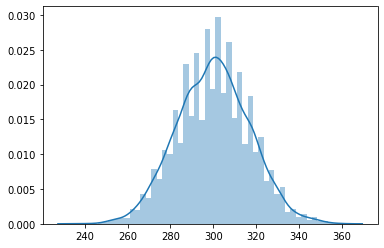

In [89]:
# binomial distribution
sns.distplot(np.random.binomial(10000, 0.03, 10000))
plt.show()

## Q1B) Given, sample_mean = 140, std_dev = 25 n = 200. Calculate the estimated standard error of the sample mean.

In [90]:
# given data

# sample mean
xbar = 140
# sample std error
s = 25
# sample size
n = 200

# std error
se = s / np.sqrt(n)
print("Standard error (SE):", se)

Standard error (SE): 1.7677669529663687


## Q1C) Use the middle_tn_schools.csv file.

In [91]:
# reading date and creating dataframe
df_school = pd.read_csv('C:/Users/shara/Desktop/GreatLearning/Final Exams/09 SMDM/middle_tn_schools.csv')
df_school.head()

name  school_rating   size  reduced_lunch  \
0  Allendale Elementary School            5.0  851.0           10.0   
1          Anderson Elementary            2.0  412.0           71.0   
2             Avoca Elementary            4.0  482.0           43.0   
3                Bailey Middle            0.0  394.0           91.0   
4          Barfield Elementary            4.0  948.0           26.0   

   state_percentile_16  state_percentile_15  stu_teach_ratio    school_type  \
0                 90.2                 95.8             15.7         Public   
1                 32.8                 37.3             12.8         Public   
2                 78.4                 83.6             16.6         Public   
3                  1.6                  1.0             13.1  Public Magnet   
4                 85.3                 89.2             14.8         Public   

   avg_score_15  avg_score_16  full_time_teachers  percent_black  \
0          89.4          85.2                54.0            2.9   
1          43.0          38.3                32.0            3.9   
2          75.7          73.0                29.0            1.0   
3           2.1           4.4                30.0           80.7   
4          81.3          79.6                64.0           11.8   

   percent_white  percent_asian  percent_hispanic  
0           85.5            1.6               5.6  
1           86.7            1.0               4.9  
2           91.5            1.2               4.4  
3           11.7            2.3               4.3  
4           71.2            7.1               6.0

### Is the percentage of black students skewed on any side?

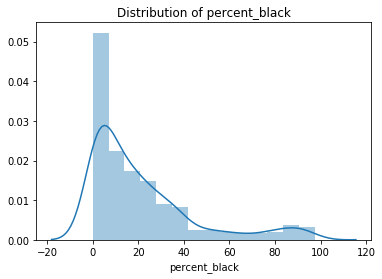

Skewness: 1.62463816516382


In [92]:
# distplot for distribution
sns.distplot(df_school['percent_black'])
plt.title('Distribution of percent_black', fontsize=12)
plt.show()

# skewness
print("Skewness:", df_school['percent_black'].skew())

**Observations:**
* From the above distplot and skewness value, we can say that the `percent_black` is skewed towards right.

### Is there any correlation between reduced lunch and school rating?

In [93]:
# pearsons correlation coeff
df_school[['school_rating','reduced_lunch']].corr()

school_rating  reduced_lunch
school_rating       1.000000      -0.815757
reduced_lunch      -0.815757       1.000000

In [94]:
# statistical test
stats.spearmanr(df_school['school_rating'], df_school['reduced_lunch'])

SpearmanrResult(correlation=-0.8216272046081889, pvalue=3.1687770829320487e-86)

**Interpretation:**
* Pearson's correlation coefficient value between `reduced_lunch` and `school_rating` is -0.815, suggesting that there is strong correlation between the two.
* Since the p-value is less than alpha (0.05), we reject Null Hypothesis. Hence, it is statistically proved that `reduced_lunch` and `school_rating` are correlated.

## Q2) 20 seeds subjected to chemicals had weights 9.0, 8.8, 10.2, 7.4,9.5, 7.0, 6.6,, 9.6, 9.9, 7.6, 7.4, 11.6, 10.4, 11.1, 8.5, 10.0, 10.7, 10.3, 11.2, and 8.0 g.  [5 MARKS]

In [95]:
# creating the sample
sample_q2 = [9.0, 8.8, 10.2, 7.4,9.5, 7.0, 6.6, 9.6, 9.9, 7.6, 7.4, 11.6, 10.4, 11.1, 8.5, 10.0, 10.7, 10.3, 11.2, 8.0]

### 2.A) Is the mean weight of all seeds μ = 10grams different from the mean weight of this sample?

In [96]:
# population mean
mu = 10

# sample size
n = 20

# significance level
alpha = 0.05 # assumed

# sample mean
xbar = np.mean(sample_q2)
print("Population mean:", mu, "\tSample mean:", xbar)

Population mean: 10 	Sample mean: 9.24


**Observation:**
* From the above values, population mean and sample mean are differing by value of 0.76 g.

**Hypothesis Test Statement**

**Null Hypothesis (H<sub>0</sub>) :** The average weight of seeds is 10.0 g ($\mu$ = 10.0).

**Alternate Hypothesis (H<sub>a</sub>) :** The average weight of seeds is not 10.0 g ($\mu$ != 10.0).

**Choosing test:**

Since we do not know population standard deviation and also sample size is less than 30, we use one sample two tail t-test.

In [97]:
# sample std dev
s = np.std(sample_q2)
print("Sample std. dev\t:", s)

# std. error
se = s / np.sqrt(n)
print("Standard error\t:", se)

# cal t-statistic
tstat = (xbar - mu) / se
print("t-statistic\t:", tstat)

# cal p-value
pvalue = stats.t.cdf(tstat, n-1)
print("p-value\t\t:", pvalue)

Sample std. dev	: 1.4728883189162714
Standard error	: 0.3293478404362172
t-statistic	: -2.3075906585371535
p-value		: 0.016221831587060538


**Interpretation:**
* Since it is two-tailed test, critical region is less than 0.025 and greater than 0.975.
* Since p-value is less than alpha/2 (0.025), we reject Null Hypothesis. Hence, it is statistically proven that average weight of seeds is not 10.0 g.

### 2.B) Find the 95% confidence interval.

In [98]:
# t-critical
tcritical = stats.t.ppf(alpha/2, n-1) # confidence level
print("t-critical\t:", tcritical)

# margin of error
margin_error = tcritical * se
print("Margin of error\t:", margin_error)

# CI of estimated population mean at 95% confidence level
print("CI of estimated basket size at 95% confidence level:", (xbar - margin_error, xbar + margin_error))

t-critical	: -2.0930240544082634
Margin of error	: -0.6893329523004171
CI of estimated basket size at 95% confidence level: (9.929332952300417, 8.550667047699584)


## Q3) The mean weight of 30 seeds is measured before and after the plants are treated with fertilizer X. Does the weight of the seeds increase after the treatment with the fertilizer?  [5 MARKS]

In [99]:
# sample before treatment
x1 = [10.8, 6.4, 8.3, 7.6, 11.4, 9.9, 10.6, 8.7, 8.1, 10.9, 11.0, 11.8, 7.3, 9.6, 9.3, 9.9, 9.0, 9.5, 10.6, 10.3, 8.8, 12.3, 8.9, 10.5, 11.6, 7.6, 8.9, 10.4, 10.2, 8.8]

# sample after treatment
x2 = [7.8, 7.5, 9.5, 11.7, 8.1, 8.8, 8.8, 7.7, 9.7, 7.0, 9.0, 9.7, 11.3, 8.7, 8.8, 10.9, 10.3, 9.6, 8.4, 6.6, 7.2, 7.6, 11.5, 6.6, 8.6, 10.5, 8.4, 8.5, 10.2, 9.2]

**Hypothesis Test Statement**

**Null Hypothesis (H<sub>0</sub>) :** The average weight of seeds is not affected by treatment ($\mu$<sub>before</sub> = $\mu$<sub>after</sub>).

**Alternate Hypothesis (H<sub>a</sub>) :** The average weight of seeds is affected by treatment ($\mu$<sub>before</sub> != $\mu$<sub>after</sub>).

**Choosing test:**

Since the samples are paired, we use two sample paired t-test.

**Testing the assumptions:**
1. Random sampling
2. Normality of continuous variable
3. Variance of stress levels across age

In [100]:
# testing first assumption
# Let us assume that the samples are randomly sampled

In [101]:
# normality test
print("Statistic: {}\tp-value: {}".format(*stats.shapiro(x1 + x2)))

Statistic: 0.9822664260864258	p-value: 0.5315385460853577


**Interpretation:**
* Since the p-value is greater than alpha (0.05), we fail to reject Null Hypothesis. Hence, it is statistically proven that
the variable follows normality.

In [102]:
# variance test
stats.levene(x1, x2)

LeveneResult(statistic=0.11702030097127823, pvalue=0.7335254354648183)

**Interpretation:**
* Since the p-value is greater than alpha (0.05), we fail to reject Null Hypothesis. Hence, it is statistically proven that both the samples are having similar variance.

In [103]:
# hypothesis test
stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=1.602296712950237, pvalue=0.11992805587021194)

**Interpretation:**
* Since the p-value is greater than alpha (0.05), we fail to reject Null Hypothesis. Hence, it is statistically proven that the treatment has no impact on weight of seeds.

## Q4) The scores of a Statistics test show a mean of 70 and a standard deviation of 10. The distribution of the scores can be represented by a normal distribution.                                                                                                              (5 MARKS)

In [104]:
# given data

# mean
mu = 70
# std. dev
sd = 10

### 4.1) what percent of the students scored higher than 80?

In [105]:
# percentage of students scoring more than 80
(1 - stats.norm.cdf(80,mu,sd)) * 100

15.865525393145708

### 4.2) what percent of the students who pass the test (grades≥60)?

In [106]:
# percentage of students passed
(1 - stats.norm.cdf(60,mu,sd)) * 100

84.1344746068543

### 4.3) what percent of the students should fail the test (grades<60)?

In [107]:
# percentage of students failed
stats.norm.cdf(60,mu,sd) * 100

15.865525393145708

# Section B

## Q5) Generate a sample of 100 Gaussian random numbers in each sample with a mean of 0 and a standard deviation of 1.

### Observations in the first sample should have a mean of 50 and a standard deviation of 5.

In [108]:
# 50 observations with mean 50 and std dev 5
x1 = np.random.normal(50, 5, 50)

### Observations in the second sample should have a mean of 51 and a standard deviation of 5.

In [109]:
# 50 observations with mean 51 and std dev 5
x2 = np.random.normal(51, 5, 50)

### Calculate the statistic and p-value. Test the hypothesis if the means of the two populations are equal.

**Hypothesis Test Statement**

**Null Hypothesis (H<sub>0</sub>) :** The mean of both the samples is same ($\mu$<sub>sample 1</sub> = $\mu$<sub>sample 2</sub>).

**Alternate Hypothesis (H<sub>a</sub>) :** The mean of both the samples is not same ($\mu$<sub>sample 1</sub> != $\mu$<sub>sample 2</sub>).

**Choosing test:**

Since the samples are not paired, we use two sample independent t-test.

**Testing the assumptions:**
1. Random sampling
2. Normality of continuous variable
3. Variance of stress levels across age

In [110]:
# testing first assumption
# Let us assume that the samples are randomly sampled

In [111]:
# normality test
print("Statistic: {}\tp-value: {}".format(*stats.shapiro(x1 + x2)))

Statistic: 0.9406302571296692	p-value: 0.01426969189196825


**Interpretation:**
* Since the p-value is greater than alpha (0.05), we fail to reject Null Hypothesis. Hence, it is statistically proven that
the variable follows normality.

In [112]:
# variance test
stats.levene(x1, x2)

LeveneResult(statistic=1.0190370636853285, pvalue=0.31523348936420287)

**Interpretation:**
* Since the p-value is greater than alpha (0.05), we fail to reject Null Hypothesis. Hence, it is statistically proven that both the samples are having similar variance.

In [113]:
# hypothesis test
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=-0.42138278683198926, pvalue=0.6743983905548131)

**Interpretation:**
* Since the p-value is less than alpha (0.05), we reject Null Hypothesis. Hence, it is statistically proven that the mean values in both the samples is different.

## Q6) Use the CHI_SQ_DATA.xlsx and perform a chi-square Test of Independence. alpha = 0.05

In [114]:
# reading date and creating dataframe
df_chi = pd.read_excel('C:/Users/shara/Desktop/GreatLearning/Final Exams/09 SMDM/CHI_SQ_DATA.xlsx')
df_chi

GENDER LIKE SHOPPING
0    Male            No
1  Female           Yes
2    Male           Yes
3  Female           Yes
4  Female           Yes
5    Male           Yes
6    Male            No
7  Female            No
8  Female            No

In [115]:
# categories in GENDER
list(df_chi['GENDER'].unique())

['Male', 'Female']

In [116]:
# categories in LIKE SHOPPING
list(df_chi['LIKE SHOPPING'].unique())

['No', 'Yes']

**Observations:**
* `LIKE SHOPPING` has two categories.
* `GENDER` has two categories.

### 6.1. Find the degree of freedom, chi-square statistic, p-value.

**Hypothesis Test Statement**

**Null Hypothesis (H<sub>0</sub>) :** `LIKE SHOPPING` is not associated with `GENDER`.

**Alternate Hypothesis (H<sub>a</sub>) :** `LIKE SHOPPING` is associated with `GENDER`.

**Choosing test:**

Since it is test of proportion across two categorical variables, with independent variable having two levels, we use chi-square independent test of proportion.

**Testing the assumptions:**
1. Each cross tab cell must have minimum of 5 observations.

In [117]:
# creating cross tab
ct_shopping = pd.crosstab(df_chi['GENDER'], df_chi['LIKE SHOPPING'])
ct_shopping

LIKE SHOPPING  No  Yes
GENDER                
Female          2    3
Male            2    2

In [118]:
# chi-square test of independence
print("Test-statistic\t\t: {}\np-value\t\t\t: {}\nDegrees of freedom\t: {}\nExpected matrix\t\t:\n{}".format(*stats.chi2_contingency(ct_shopping)))

Test-statistic		: 0.1406249999999999
p-value			: 0.7076604666545525
Degrees of freedom	: 1
Expected matrix		:
[[2.22222222 2.77777778]
 [1.77777778 2.22222222]]


**Interpretation:**
* Since p-value is greater than alpha (0.05), we fail to reject Null Hypothesis. Hence, it is statistically proven that `LIKE SHOPPING` is not associated with `GENDER`.

## Q7) The mass of N1=20 acorns from oak trees up wind from a coal power plant and N2=30 acorns from oak trees downwind from the same coal power plant are measured. Are the acorns from trees downwind less massive then the ones from up wind? The sample sizes are not equal but we will assume that the population variance of sample 1 and sample 2 are equal. alpha = 0.05, t-critical for specified alpha level = -1.677

In [119]:
# sample up wind
x1 = [10.8, 10.0, 8.2, 9.9, 11.6, 10.1, 11.3, 10.3, 10.7, 9.7, 7.8, 9.6, 9.7, 11.6, 10.3, 9.8, 12.3, 11.0, 10.4, 10.4]

# sample downwind
x2 = [7.8, 7.5, 9.5, 11.7, 8.1, 8.8, 8.8, 7.7, 9.7, 7.0, 9.0, 9.7, 11.3, 8.7, 8.8, 10.9, 10.3, 9.6, 8.4, 6.6, 7.2, 7.6, 11.5, 6.6, 8.6, 10.5, 8.4, 8.5, 10.2, 9.2]

**Hypothesis Test Statement**

**Null Hypothesis (H<sub>0</sub>) :** The mean size of acrons from oak trees downside is equal to mean size of oak trees upside ($\mu$<sub>downside</sub> = $\mu$<sub>upside</sub>).

**Alternate Hypothesis (H<sub>a</sub>) :** The mean size of acrons from oak trees downside is not equal to mean size of oak trees upside ($\mu$<sub>downside</sub> != $\mu$<sub>upside</sub>).

**Choosing test:**

Since the samples are not paired, we use two sample independent t-test.

**Testing the assumptions:**
1. Random sampling
2. Normality of continuous variable
3. Variance of stress levels across age

In [120]:
# testing first assumption
# Let us assume that the samples are randomly sampled

In [121]:
# normality test
print("Statistic: {}\tp-value: {}".format(*stats.shapiro(x1 + x2)))

Statistic: 0.9785078763961792	p-value: 0.4908932149410248


**Interpretation:**
* Since the p-value is greater than alpha (0.05), we fail to reject Null Hypothesis. Hence, it is statistically proven that
the variable follows normality.

In [122]:
# variance test
stats.levene(x1, x2)

LeveneResult(statistic=2.1383934487053775, pvalue=0.15016925768988332)

**Interpretation:**
* Since the p-value is greater than alpha (0.05), we fail to reject Null Hypothesis. Hence, it is statistically proven that both the samples are having similar variance.
* Also, it is stated in the question to assume that the variance is same for both the samples.

In [123]:
# hypothesis test
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=3.5981947686898033, pvalue=0.0007560337478801464)

**Interpretation:**
* Since the p-value is less than alpha (0.05), we reject Null Hypothesis. Hence, it is statistically proven that the mean size of acrons from oak trees downside is not equal to mean size of oak trees upside.

# Section C

## Q8) A machine is supposed to run for 300 minutes at a go, as told by a company on one unit of regular gas. A random sample of 50 machines is tested. The machine run for an average of 295 minutes, with a standard deviation of 20 minutes. Check the hypothesis if the mean run-time of a machine is 300 minutes or not.                                                                                           (15 MARKS) 

**Hypothesis Test Statement**

**Null Hypothesis (H<sub>0</sub>) :** The average run time of machine is 300 minutes ($\mu$ = 300).

**Alternate Hypothesis (H<sub>a</sub>) :** The average run time of machine is not 300 minutes ($\mu$ != 300).

**Choosing test:**

Since we do not know the population standard deviation, we use two-tail independent (unpaired) t-test.

**Testing the assumptions:**
1. Random sampling
2. Normality of continuous variable
3. Variance of stress levels across age

In [124]:
# given data

# population mean
mu = 300
# sample mean
xbar = 295
# sample SD
s = 20
# sample size
n = 50
# significance level
alpha = 0.05

In [125]:
# std. error
se = s / np.sqrt(n)
print("Standard error\t:", se)

# cal t-statistic
tstat = (xbar - mu) / se
print("t-statistic\t:", tstat)

# cal critical region
tcritical = stats.t.cdf(alpha/2, n-1) # two tail
print("Critical region:", (-tcritical, tcritical))

# cal p-value
pvalue = stats.t.cdf(tstat, n-1)
print("p-value\t\t:", pvalue)

Standard error	: 2.82842712474619
t-statistic	: -1.7677669529663689
Critical region: (-0.5099217500020995, 0.5099217500020995)
p-value		: 0.04166307987075465


**Interpretation:**
* Since it is two-tailed test, critical region is less than 0.025 and greater than 0.975.
* Since p-value is greater than alpha/2 (0.025) and less than (0.975), we fail to reject Null Hypothesis. Hence, it is statistically proven than the average run time of machine is equal to 300 mins.

## 9. A dice is thrown 132 times with the following results. Is the dice unbiased? solve the problem with following steps :

In [126]:
# creating frequency distribution table
df_dice = pd.DataFrame(zip([1,2,3,4,5,6], [16,20,25,14,29,28]), columns=['Value','Frequency'])
df_dice

Value  Frequency
0      1         16
1      2         20
2      3         25
3      4         14
4      5         29
5      6         28

**Hypothesis Test Statement**

**Null Hypothesis (H<sub>0</sub>) :** The die is fair, the proportion of observed frequencies is equal (p<sub>1</sub> = p<sub>2</sub> = p<sub>3</sub> = p<sub>4</sub> = p<sub>5</sub> = p<sub>6</sub>).

**Alternate Hypothesis (H<sub>a</sub>) :** The die is not fair, the proportion of observed frequencies is not equal (p<sub>1</sub> != p<sub>2</sub> != p<sub>3</sub> != p<sub>4</sub> != p<sub>5</sub> != p<sub>6</sub>).

**Choosing test:**

Since it is a test of proportion against known expected frequencies, it is chi-square goodness of fit test.

In [127]:
# expected values
print("Expected frequency in each case is:", df_dice['Frequency'].sum() / 6)

Expected frequency in each case is: 22.0


In [128]:
# cross tab
df_dice['Expected_Frequency'] = 22
df_dice

Value  Frequency  Expected_Frequency
0      1         16                  22
1      2         20                  22
2      3         25                  22
3      4         14                  22
4      5         29                  22
5      6         28                  22

In [129]:
# chi-square goodness of fit
stats.chisquare(df_dice['Frequency'],df_dice['Expected_Frequency'])

Power_divergenceResult(statistic=9.0, pvalue=0.1090641579497725)

**Interpretation:**
* Since the p-value is greater than the alpha (0.05), we fail to reject Null Hypothesis. Hence, it is statistically proven that the die is a fair die, unbiased.